<a href="https://colab.research.google.com/github/Love1117/Machine_learning-Projects/blob/main/Machine_Learning%20Project/04_NLP%20Projects/Traditional%20NLP/Email%20Spam%20Detection%20System/Email_Spam_Detection_System1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

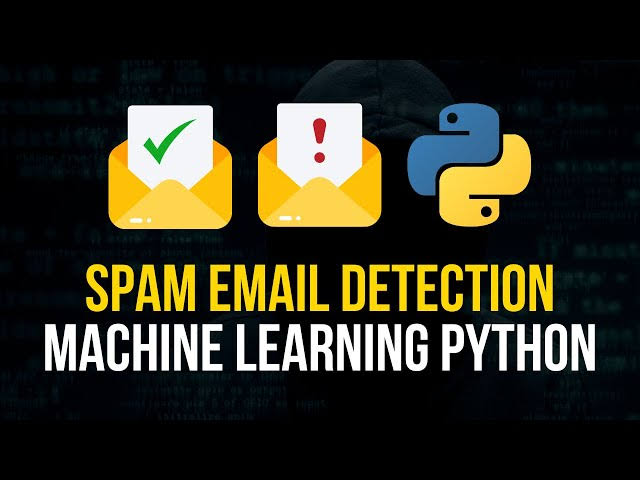
#**Project Summary: Email Spam Classification Using SVM**

##**Overview**

This project focuses on building an Email Spam Detection System using a Support Vector Machine (SVM) classifier. The dataset consists of labeled emails categorized as either spam or ham (legitimate mail). After thorough text preprocessing—cleaning, tokenizing, and normalizing—the email text was transformed into numerical features using TF-IDF Vectorization.


---

##**Aim of the Project**

The main goals of this project are:

•To develop a machine learning–based system that can automatically classify emails as spam or legitimate.

•To use TF-IDF vectorization for effective representation of text data.

•To apply Support Vector Machines for high-performance binary classification.

•To create a reliable and scalable tool that enhances email security and reduces the risk of phishing or fraud.


##**import libraries for my project**

In [ ]:
from google.colab import drive
drive.mount("/content/drive")
import pandas as pd
import numpy as np

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##**Loading Dataset from Drive**

In [ ]:
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/spam-classification.csv", encoding="latin1", sep=';')
df

,Label,Email
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
8576,1,abc s good morning america ranks it the NUMBE...
8577,1,hyperlink hyperlink hyperlink let mortgage le...
8578,1,thank you for shopping with us gifts for all ...
8579,1,the famous ebay marketing e course learn to s...


##**Data Preprocessing**

In [ ]:
print(f"Num of duplicate Values: {df.duplicated().sum()}")
print(f"Num of null Values: {df.isna().sum()}")

Num of duplicate Values: 539
Num of null Values: Label    16
Email     3
dtype: int64


In [ ]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

print(f"Num of duplicate Values: {df.duplicated().sum()}")
print(f"Num of null Values: {df.isna().sum()}")

Num of duplicate Values: 0
Num of null Values: Label    0
Email    0
dtype: int64


In [ ]:
df.shape

(8024, 2)

##**There is an imbalance on my target variable**

In [ ]:
df.Label.value_counts()

,count
Label,
0,6944
1,1079
"0""""""",1


##**There is an invalid number which needs to be treated  for my classification model**

In [ ]:
import re
df['Label'] = df["Label"].astype(str).apply(lambda x: re.sub(r"[^\s0-9]", "0", x))
df['Label'] = df['Label'].astype(int)
df['Label'] = df['Label'].replace({100:1})
df.Label.value_counts()

,count
Label,
0,6945
1,1079


#**Vectorize the Email column using TF-IDF**


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidvec = TfidfVectorizer()
Email = tfidvec.fit_transform(df["Email"])
print(Email[10])

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 18 stored elements and shape (1, 33990)>
  Coords	Values
  (0, 30337)	0.08947327723856499
  (0, 9082)	0.1731096268141382
  (0, 2174)	0.10548850796560605
  (0, 12784)	0.3019419769320655
  (0, 3555)	0.13324253570698244
  (0, 13996)	0.20791635162799635
  (0, 27963)	0.25816994231020796
  (0, 32484)	0.18796954782163544
  (0, 29518)	0.23491939053895297
  (0, 1187)	0.16631432793670023
  (0, 30057)	0.12454318212270524
  (0, 28819)	0.24133655488255268
  (0, 2373)	0.32886139616937093
  (0, 30433)	0.2989157197440136
  (0, 31958)	0.19245473830109108
  (0, 7325)	0.4490294291325983
  (0, 10087)	0.24460725426745672
  (0, 30352)	0.2101486449511321


In [ ]:
x = Email
y = df.Label

##**From my previous review i already know there is an imbalance in my target variable. Am applying SMOTE to balance values (0 and 1)**

In [ ]:
from imblearn.over_sampling import SMOTE
Smote = SMOTE()

# Apply SMOTE to the vectorized data
x_sampled, y_sampled = Smote.fit_resample(x,y)


##**Balanced target features**

In [ ]:
y_sampled.value_counts()

,count
Label,
0,6945
1,6945


##**Creating input variable and target variable**

In [ ]:
x = x_sampled
y = y_sampled

##**Model Preparation: Spliting into train/test sets to evaluate performance.**

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=37)

In [ ]:
print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")

x_train shape: (11112, 33990)
x_test shape: (2778, 33990)


##**Model Building: Train model using Naive bayes**

In [ ]:
from sklearn.svm import SVC
model = SVC()

model.fit(x_train, y_train)

SVC()

##**Model score**

In [ ]:
model.score(x_test, y_test)

0.9953203743700504

In [ ]:
y_pred = model.predict(x_test)

##**Classification report: Accuracy / F1-Score | 100% | High confidence in classifying Email spams**

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

Class_report = classification_report(y_pred, y_test)
print(Class_report)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1415
           1       0.99      1.00      1.00      1363

    accuracy                           1.00      2778
   macro avg       1.00      1.00      1.00      2778
weighted avg       1.00      1.00      1.00      2778



##**Visualization using Confusion Matrix**

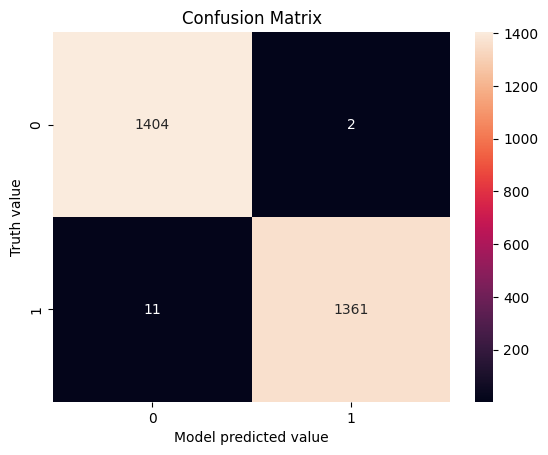

In [ ]:
Confusion_matrix = confusion_matrix(y_test, y_pred)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.heatmap(Confusion_matrix, annot=True, fmt="g")
plt.xlabel("Model predicted value")
plt.ylabel("Truth value")
plt.title("Confusion Matrix")
plt.show()

##**Texting With New Emais**

In [ ]:
text_1 = "congratulations you have won a free lottery, claim now"


text_2 = "hello dear friend, it's nice to see you, it's been a long time. how have you been?"

In [ ]:
def pred(text):
  new_vec = tfidvec.transform([text])
  prediction = model.predict(new_vec)
  if prediction[0] ==1:
    print("Spam")
  else:
    print("Not-Spam")
print(pred(text_1))

Spam
None


In [ ]:
print(pred(text_2))

Not-Spam
None


##**Conclusion / Deployment Summary**

When deployed, this SVM-based spam detection system can:

Automatically filter incoming emails, labeling them as spam or safe.

Protect users from fraudulent, phishing, and malicious email content.

Integrate into email clients or backend systems to improve inbox quality.

Serve as a foundational security component in larger communication or fraud-prevention pipelines.


Overall, the model provides a fast, accurate, and dependable solution for real-world email spam filtering.